In [53]:
import pandas as pd
import numpy as np

#for ploting the graphs
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#machine learning model
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#machine learning model evaluation
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,auc, confusion_matrix, classification_report

from sklearn.preprocessing import label_binarize
from itertools import cycle

In [72]:
df=pd.read_csv('/content/Ddos_data.csv')

In [73]:
df.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN


Data  Preprocessing

In [74]:
# Remove the spaces before the column names
df.columns=df.columns.str.strip()

In [79]:
#Unique values in the label target columns
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

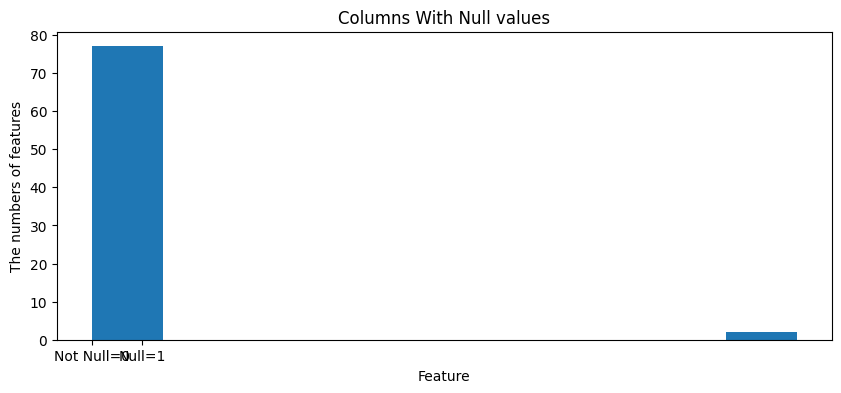

In [80]:
#checking the nullvalues in the dataset
plt.figure(1,figsize=(10,4))
plt.hist(df.isna().sum())

#set the title and axis labels
plt.xticks([0,1],labels=['Not Null=0','Null=1'])
plt.title('Columns With Null values');
plt.xlabel('Feature')
plt.ylabel('The numbers of features')

plt.show()

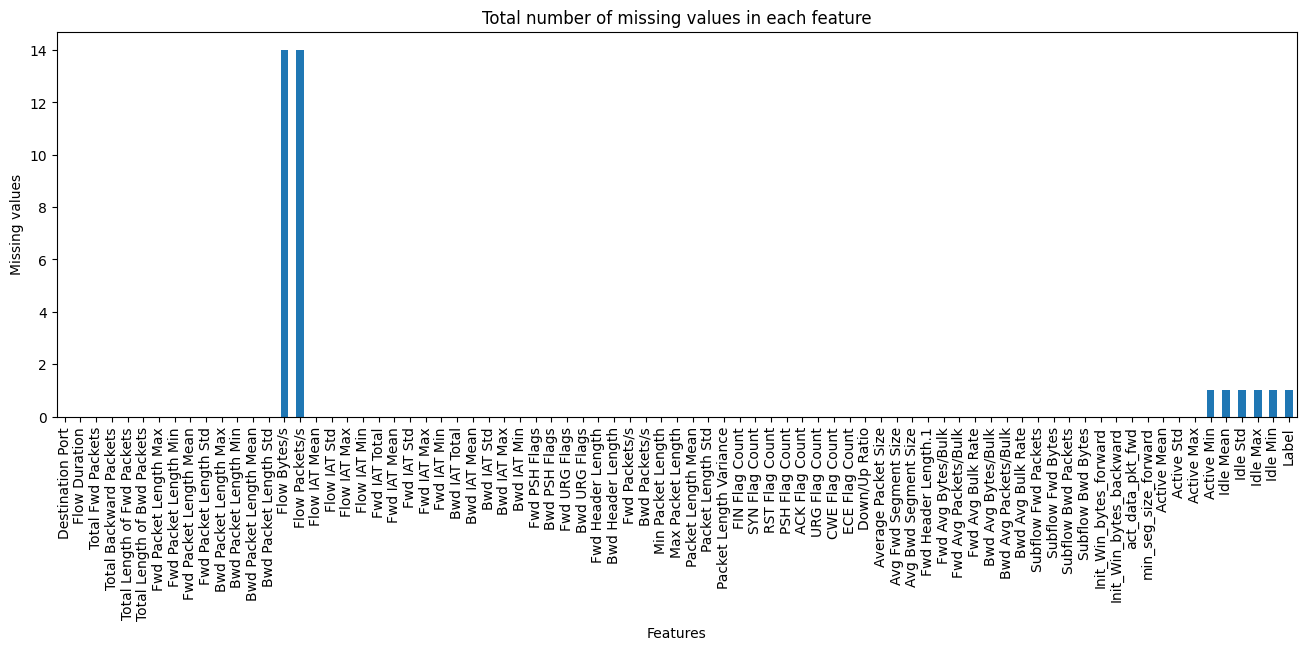

In [81]:
def plotMissingValues(dataframe):
    missing_values=dataframe.isnull().sum()
    fig=plt.figure(figsize=(16,5))
    missing_values.plot(kind='bar')
    plt.xlabel("Features")
    plt.ylabel("Missing values")
    plt.title("Total number of missing values in each feature")
    plt.show()

plotMissingValues(df)

In [82]:
data_f=df.dropna()

In [83]:
data_f.head(5)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,BENIGN


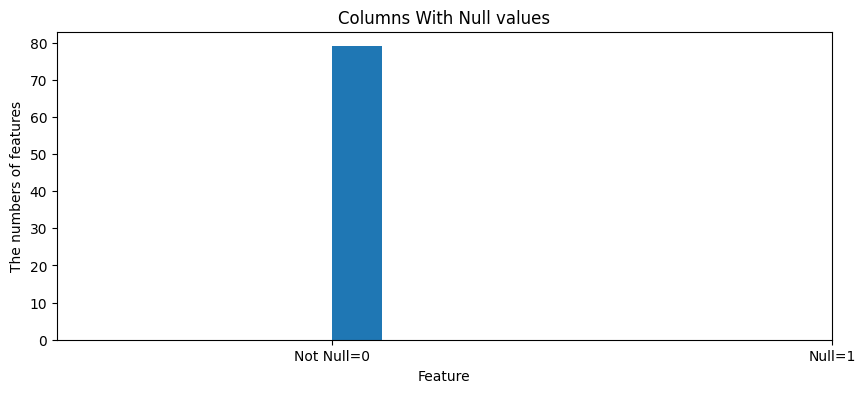

In [84]:
#checking the null value in the data set#checking the nullvalues in the dataset
plt.figure(1,figsize=(10,4))
plt.hist(data_f.isna().sum())

#set the title and axis labels
plt.xticks([0,1],labels=['Not Null=0','Null=1'])
plt.title('Columns With Null values');
plt.xlabel('Feature')
plt.ylabel('The numbers of features')

plt.show()

In [85]:
#pd.set_option('use_inf_as_na',True)
#null_values=data_f.isnull().sum()

In [86]:
(data_f.dtypes=='object')

,0
Destination Port,False
Flow Duration,False
Total Fwd Packets,False
Total Backward Packets,False
Total Length of Fwd Packets,False
...,...
Idle Mean,False
Idle Std,False
Idle Max,False
Idle Min,False


In [87]:
#converting the lables in the Dataframe to numerical values
data_f['Label']=data_f['Label'].map({'BENIGN':0,'DDoS':1})

/tmp/ipython-input-4015621701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f['Label']=data_f['Label'].map({'BENIGN':0,'DDoS':1})


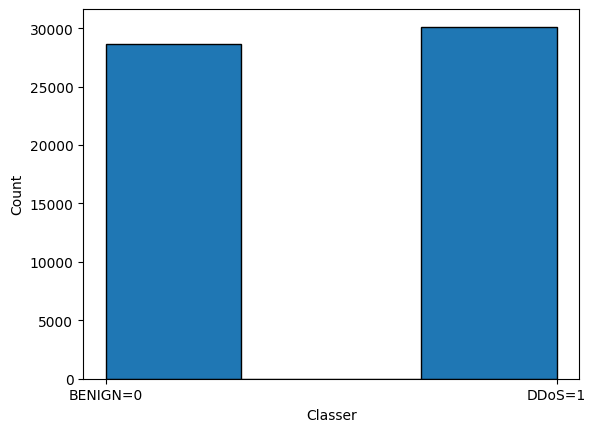

In [88]:
#print the Dataset
plt.hist(data_f['Label'],bins=[0,0.3,0.7,1],edgecolor='black')
plt.xticks([0,1], labels=['BENIGN=0','DDoS=1'])
plt.xlabel('Classer')
plt.ylabel('Count')
plt.show()

In [89]:
data_f['Label'].unique()

array([0, 1])

In [90]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,58819.000000,5.881900e+04,58819.000000,58819.000000,58819.000000,5.881900e+04,58819.000000,58819.000000,58819.000000,58819.000000,...,58819.000000,58819.000000,5.881900e+04,5.881900e+04,5.881900e+04,5.881800e+04,5.881800e+04,5.881800e+04,5.881800e+04,5.881800e+04
mean,5910.615668,1.390022e+07,5.307435,5.276492,641.848297,7.008748e+03,310.237236,21.740764,97.571101,118.278250,...,3.536034,22.237848,1.595873e+05,2.202658e+04,1.991769e+05,1.470260e+05,7.998260e+06,2.604356e+06,9.843303e+06,6.138881e+06
std,16013.561042,2.836259e+07,17.789923,25.094470,3213.253015,4.454000e+04,1319.023926,124.970057,366.940920,562.813081,...,13.817915,4.972331,8.691883e+05,3.221379e+05,1.062305e+06,8.390916e+05,1.792064e+07,9.792922e+06,2.175574e+07,1.628278e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.802050e+04,2.000000,1.000000,26.000000,6.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,8.719890e+05,3.000000,4.000000,30.000000,2.090000e+02,20.000000,0.000000,8.666667,2.828427,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.384604e+06,5.000000,5.000000,66.000000,1.160100e+04,39.000000,6.000000,36.000000,10.263203,...,4.000000,20.000000,9.960000e+02,0.000000e+00,9.960000e+02,9.960000e+02,7.048166e+06,0.000000e+00,7.052468e+06,6.081690e+06
max,61538.000000,1.199981e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


Data is not normalized

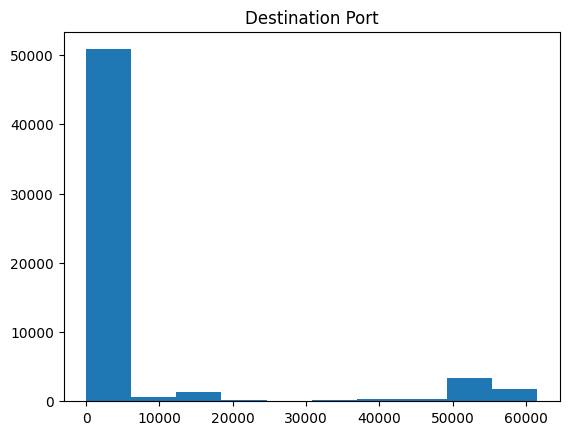

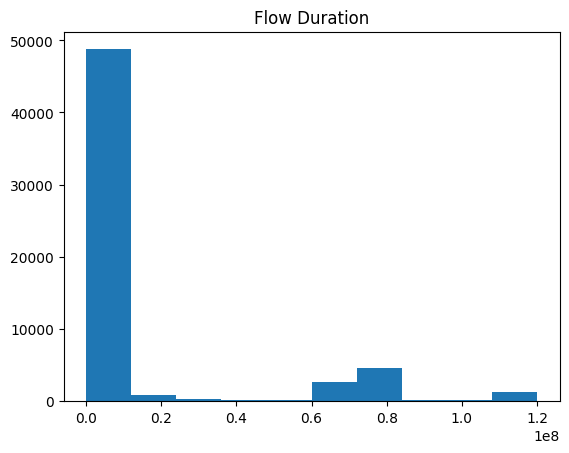

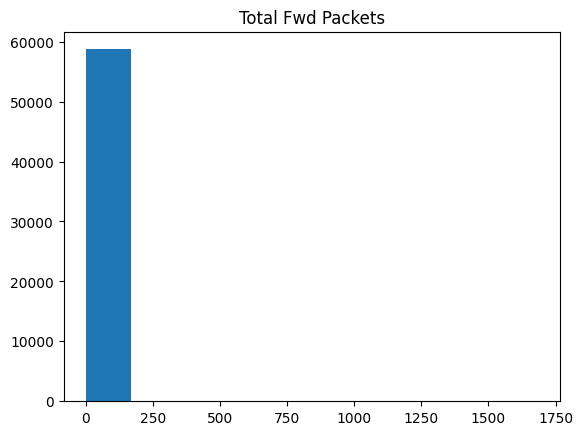

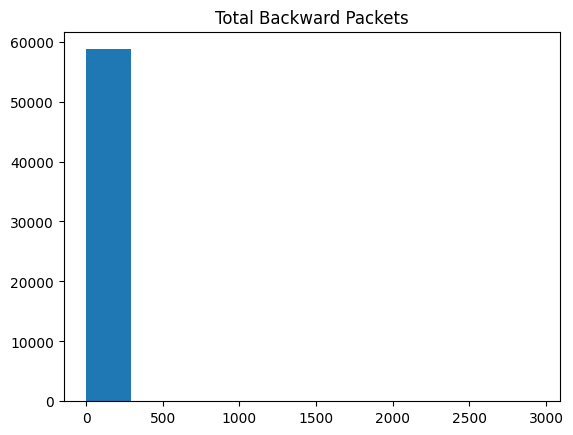

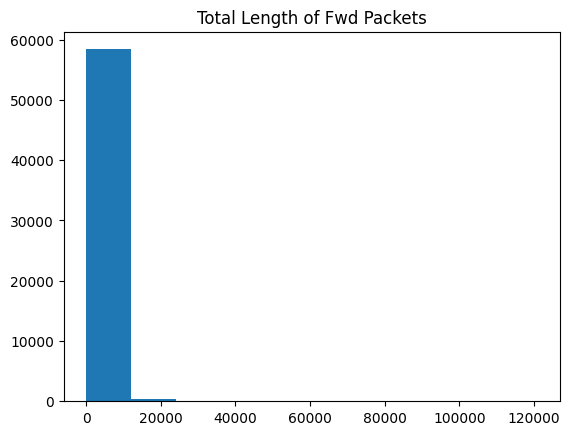

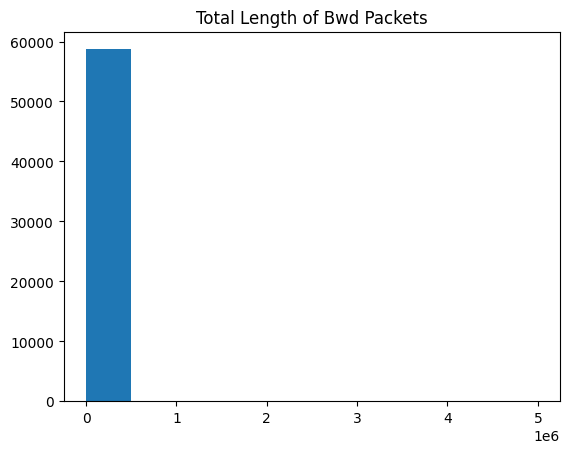

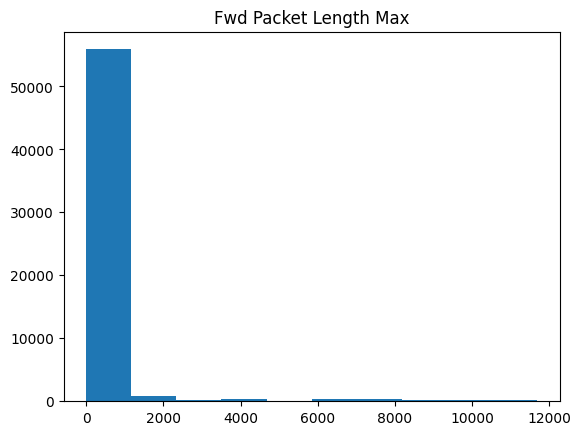

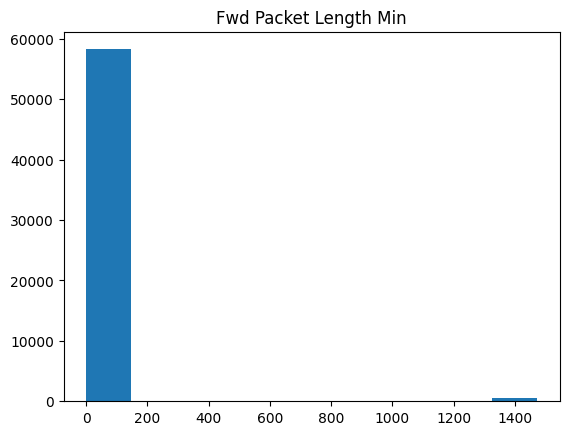

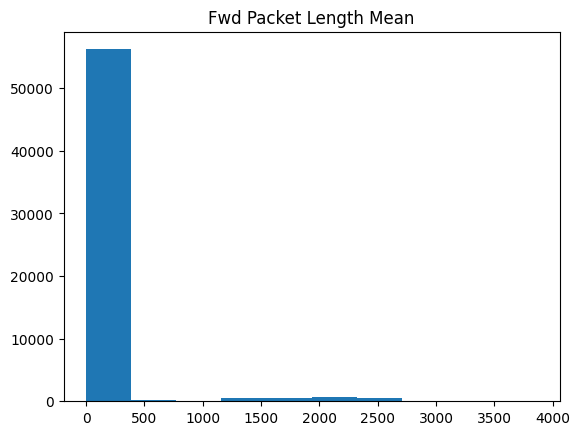

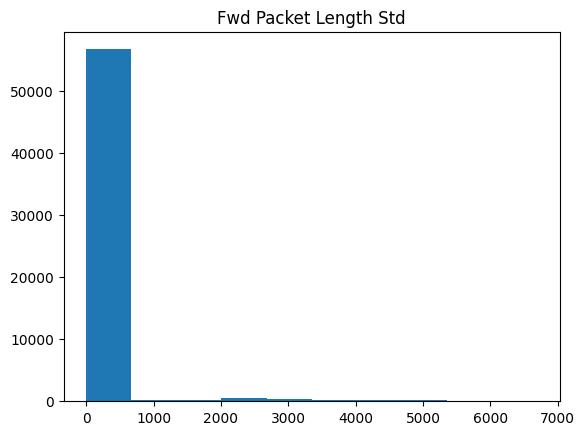

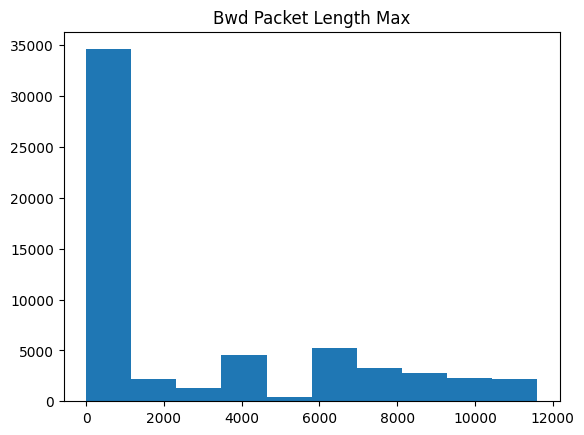

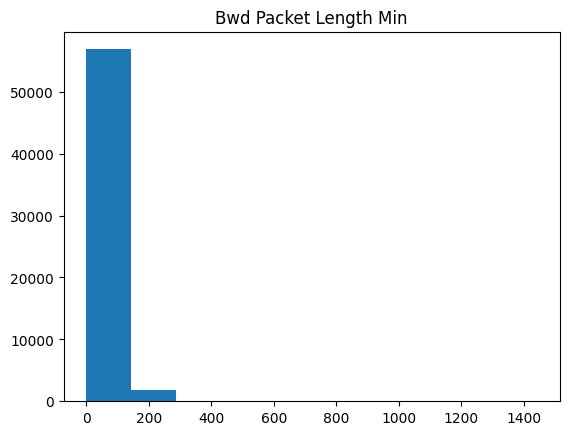

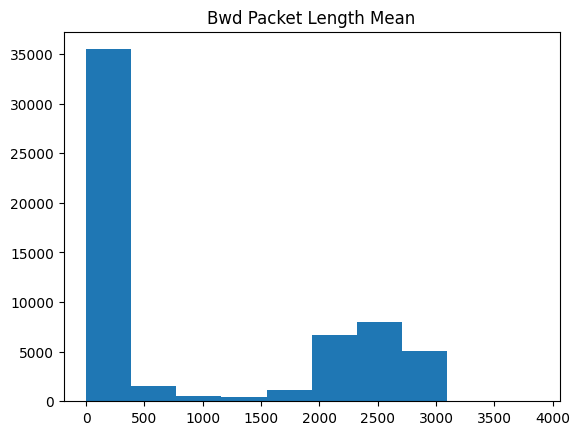

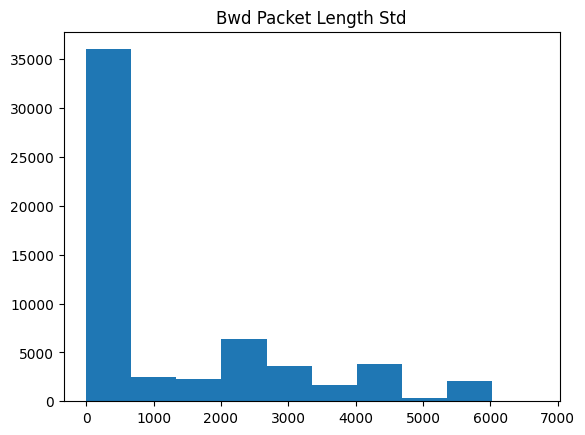

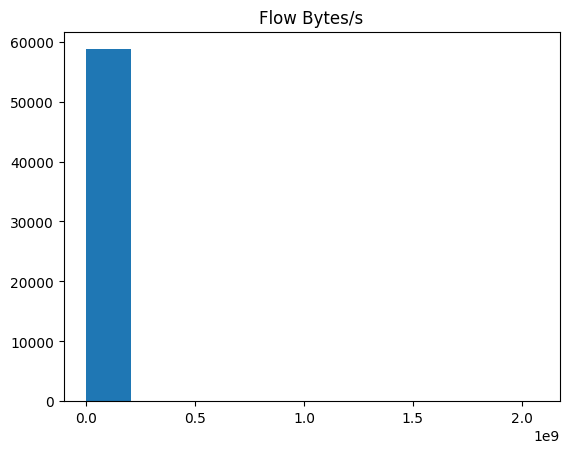

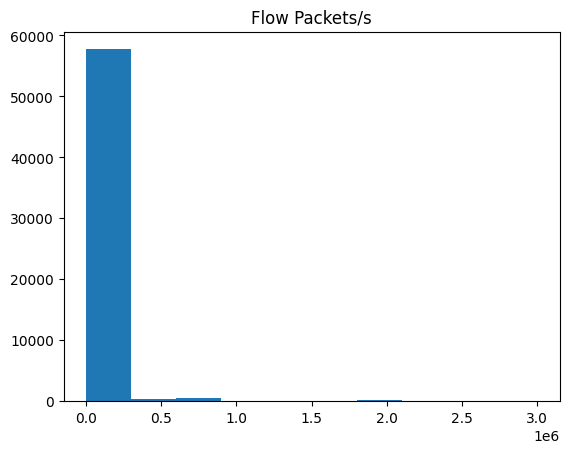

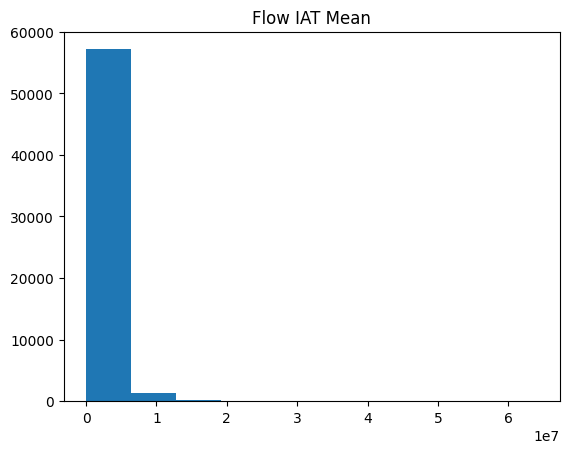

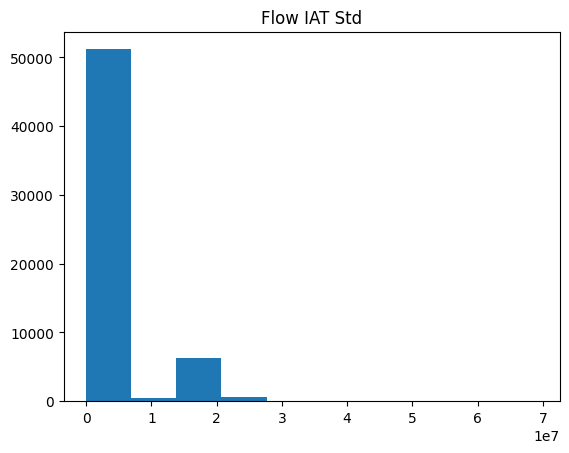

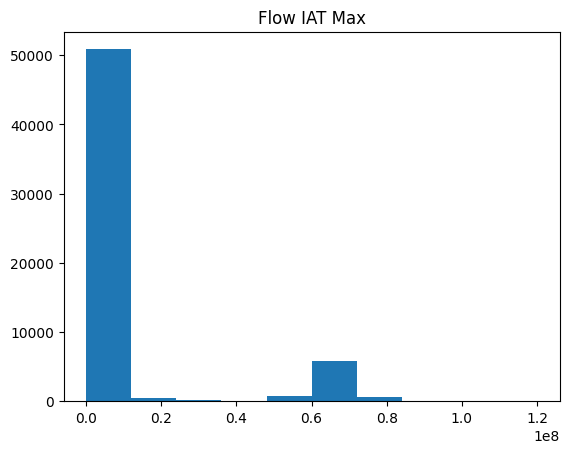

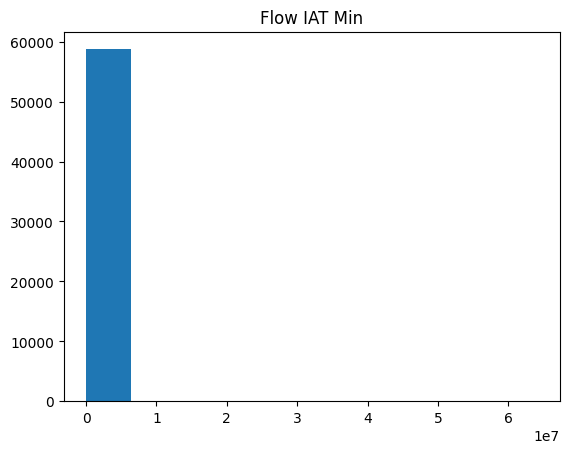

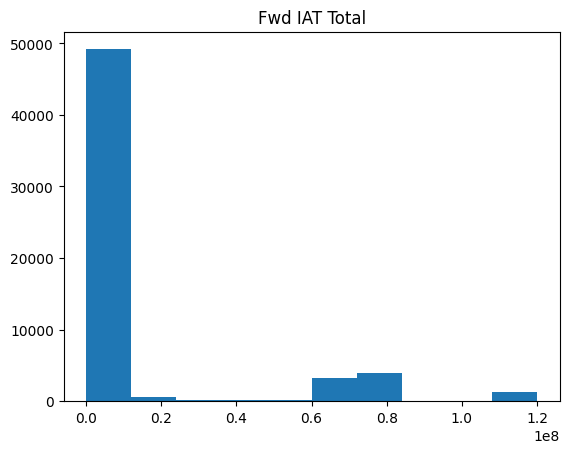

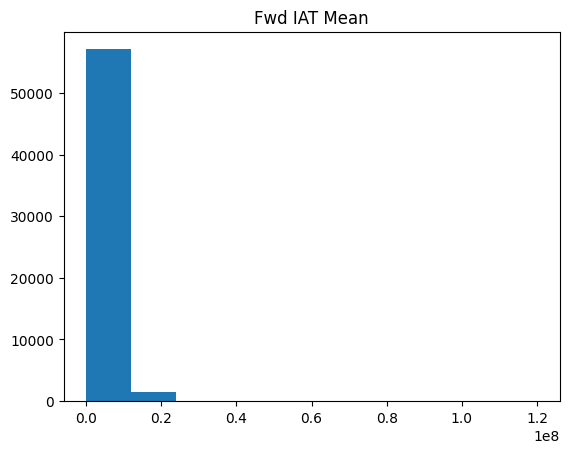

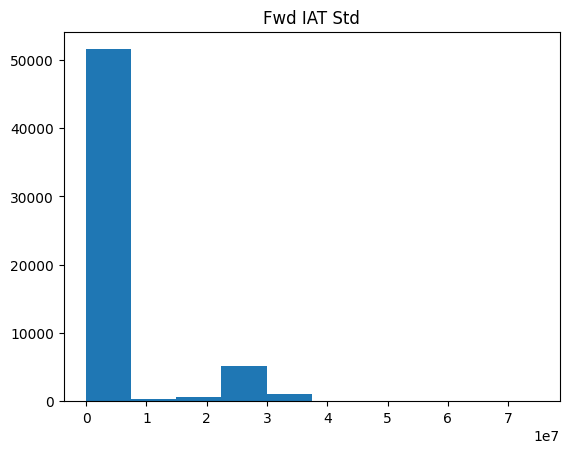

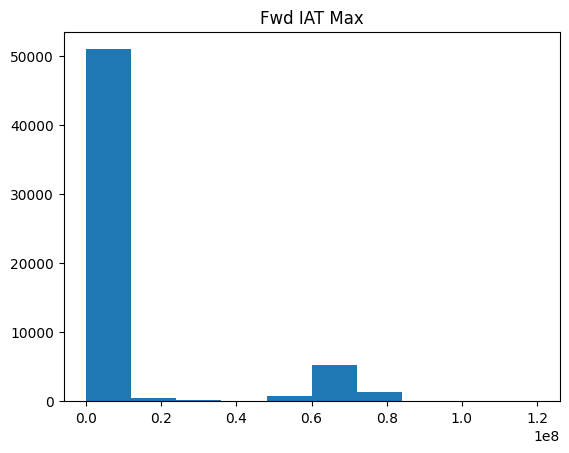

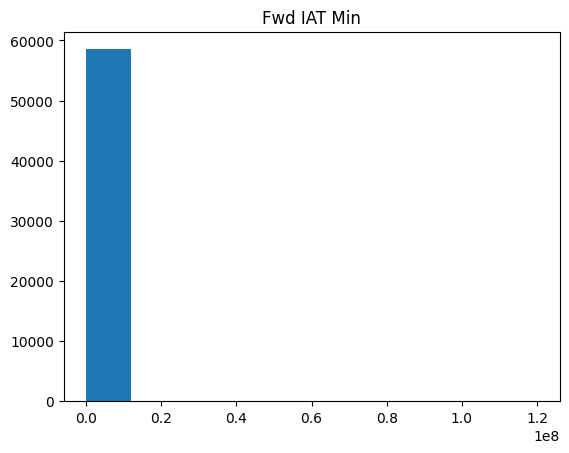

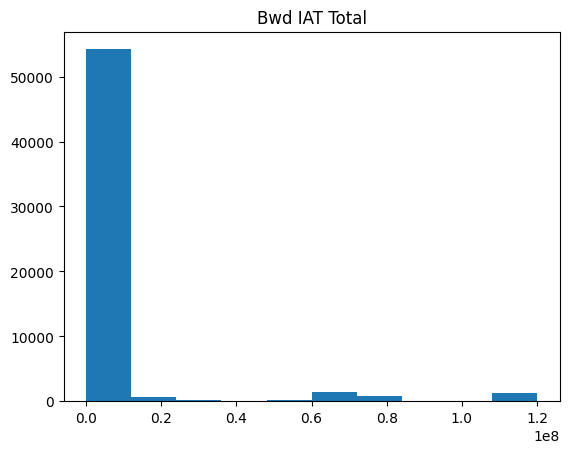

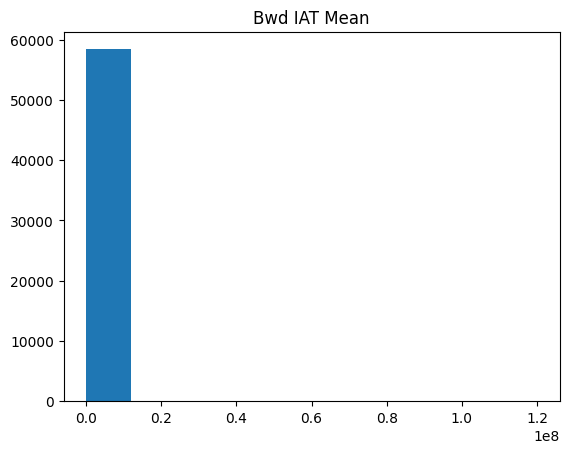

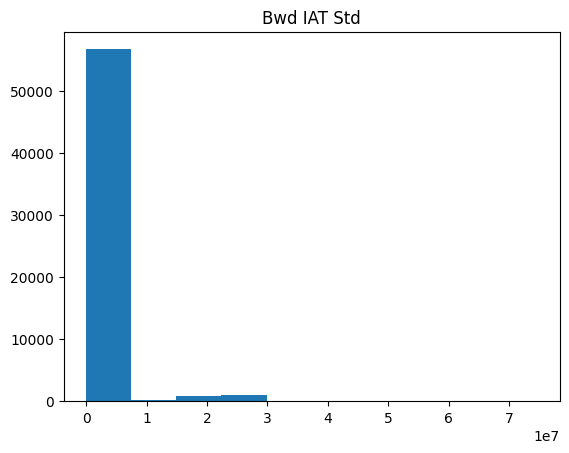

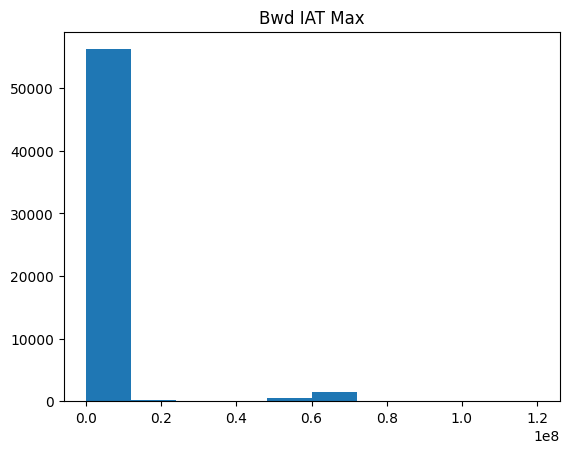

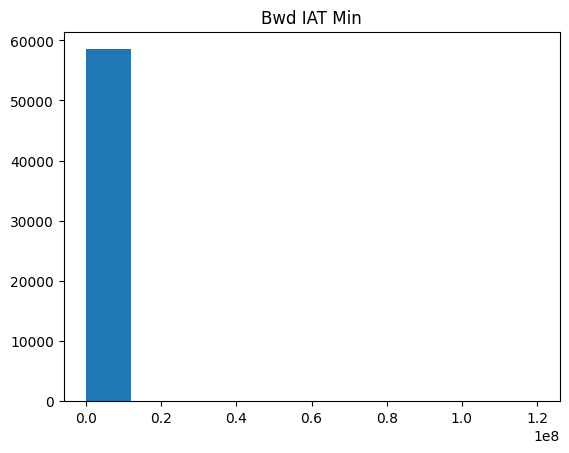

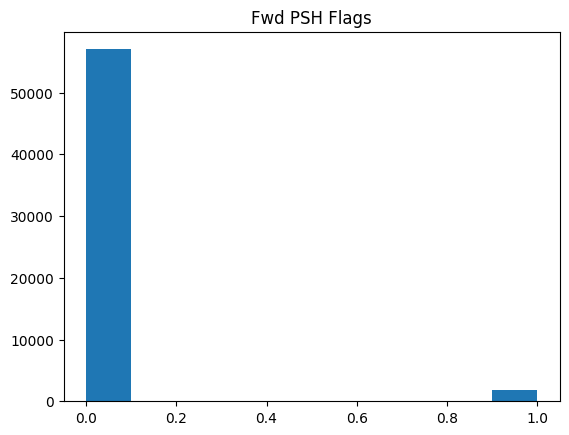

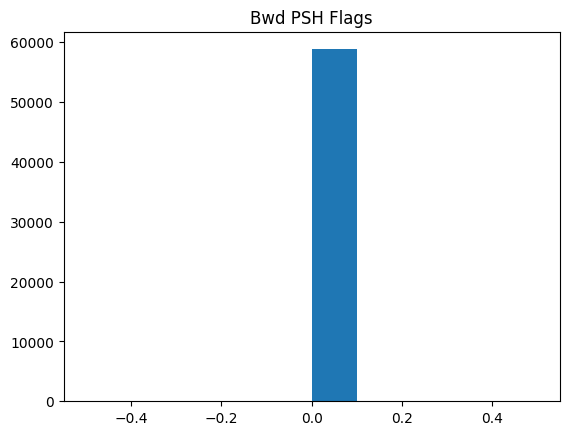

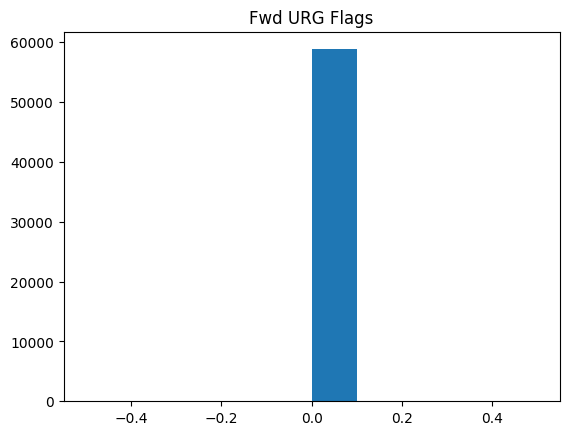

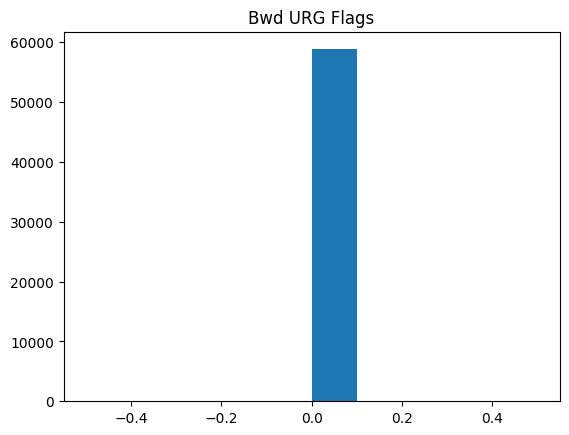

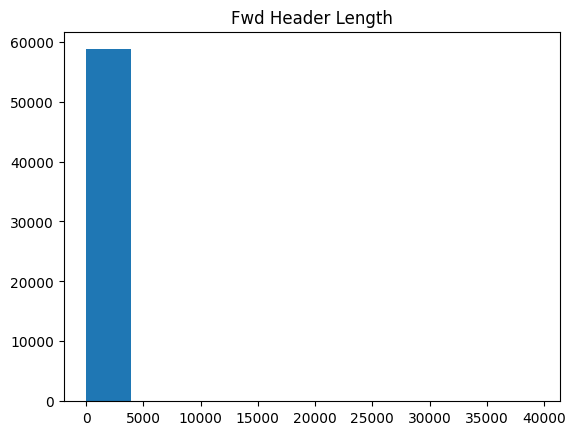

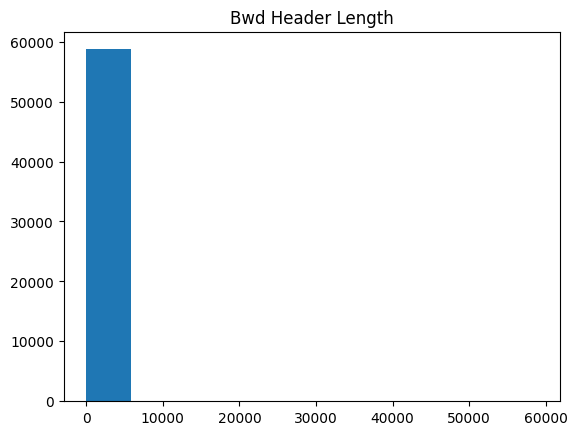

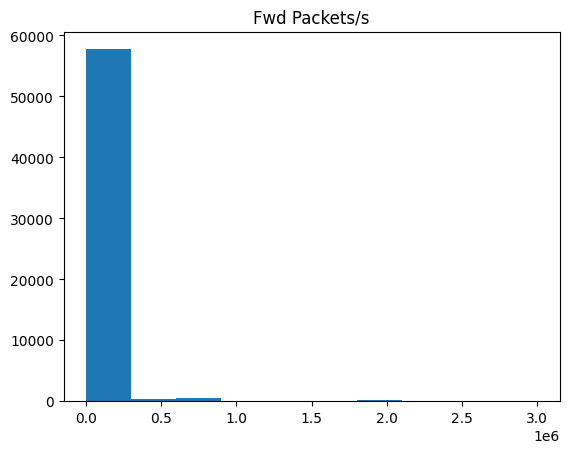

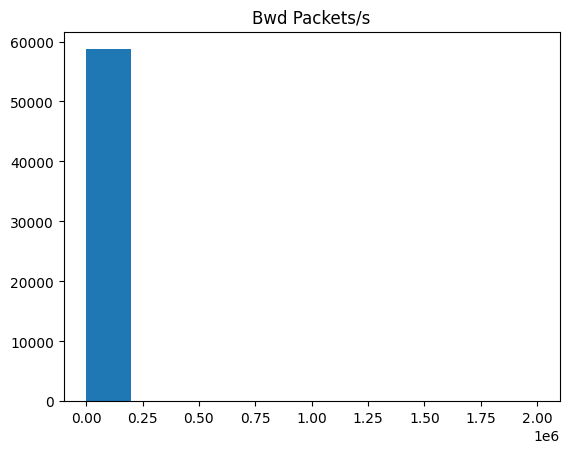

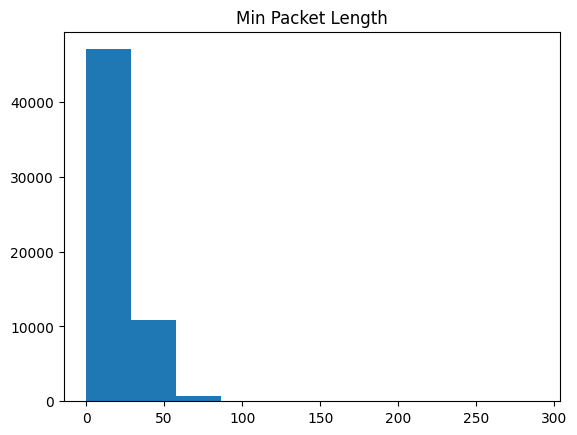

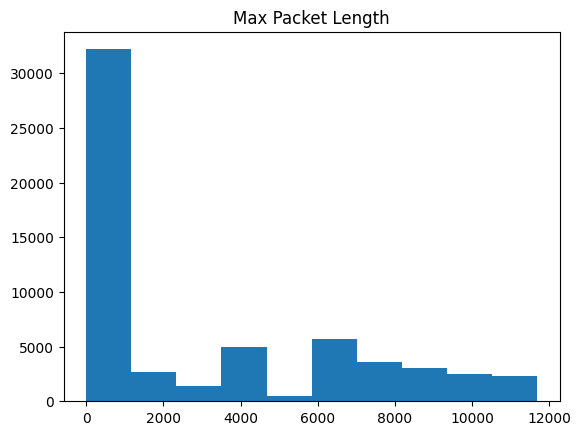

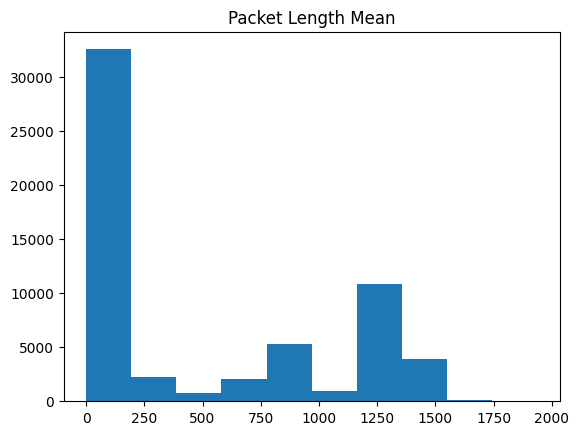

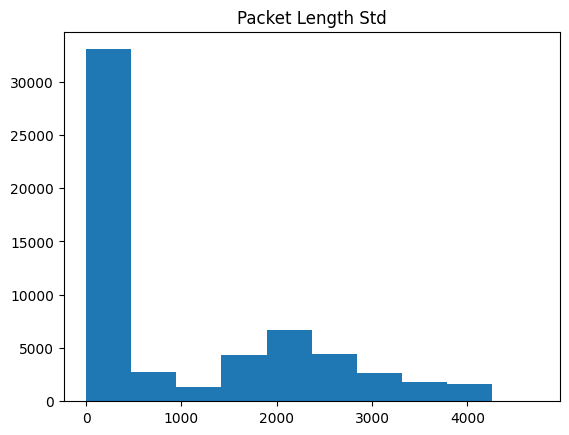

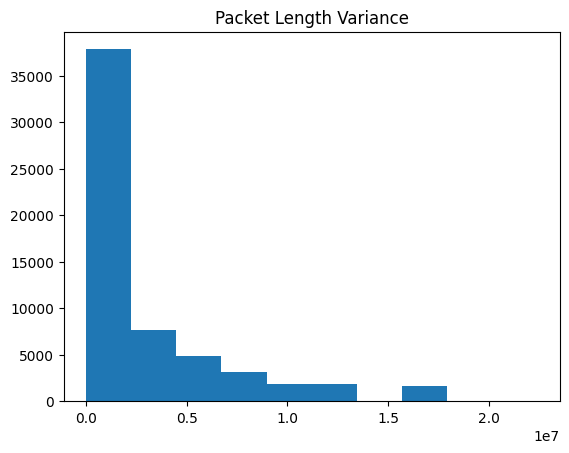

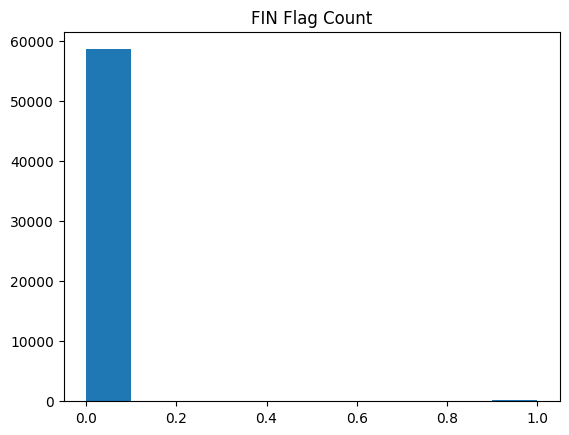

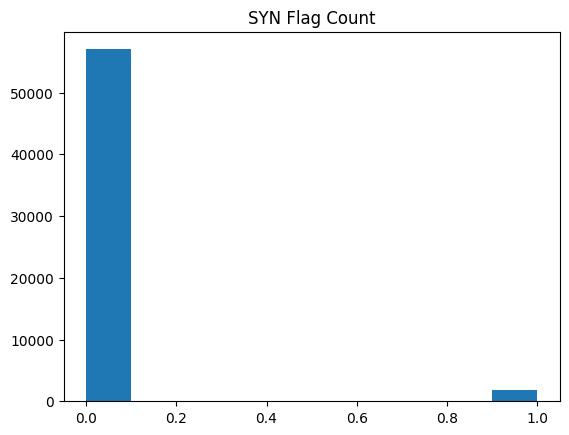

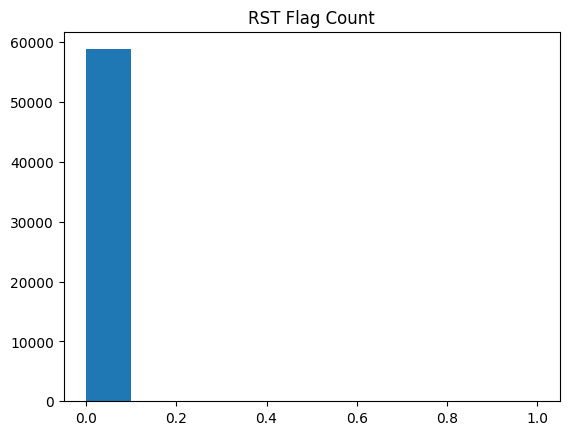

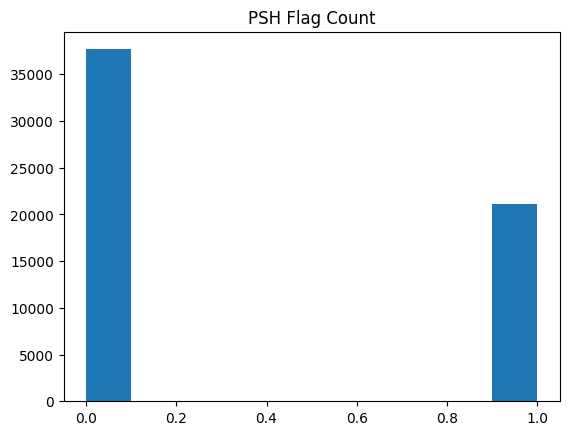

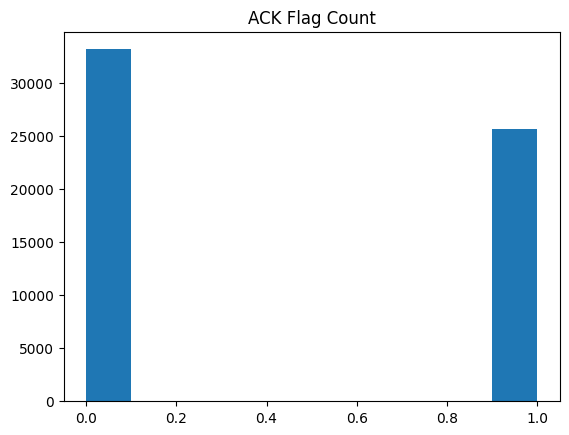

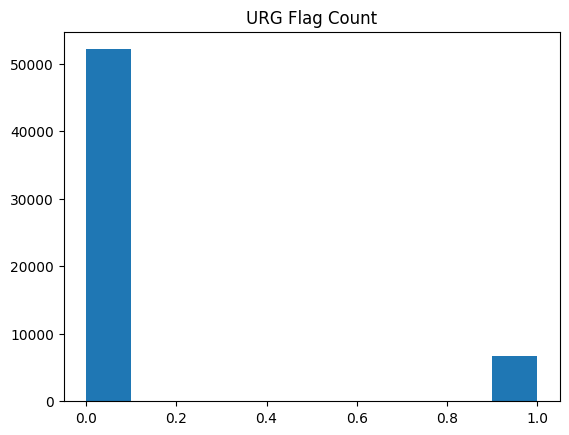

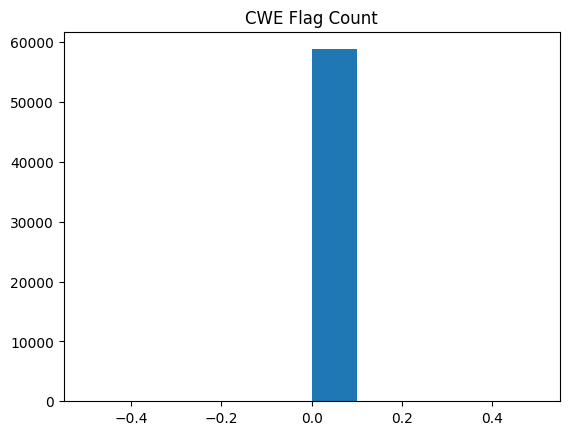

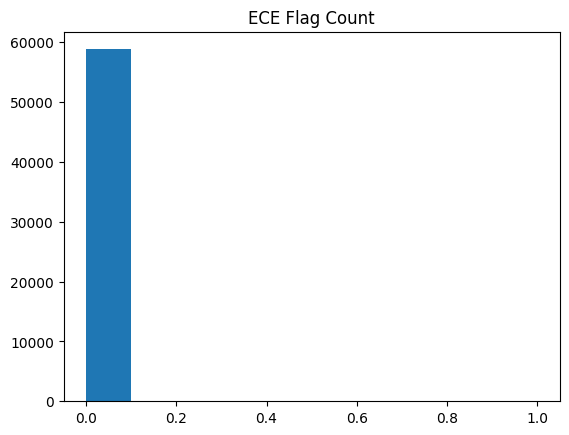

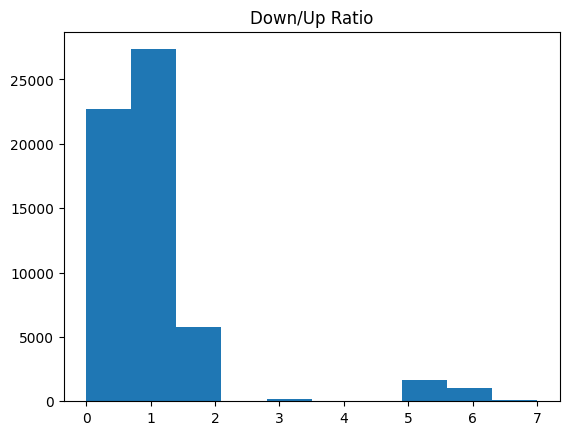

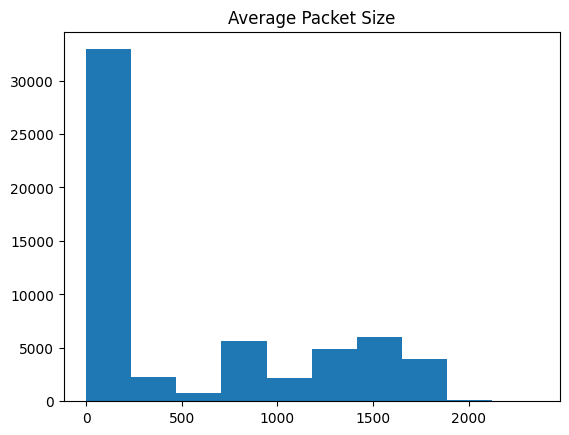

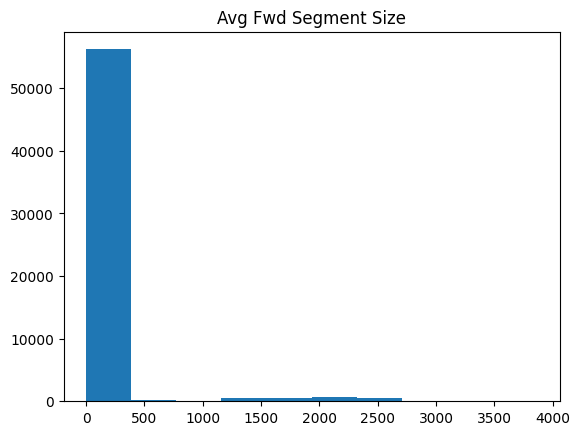

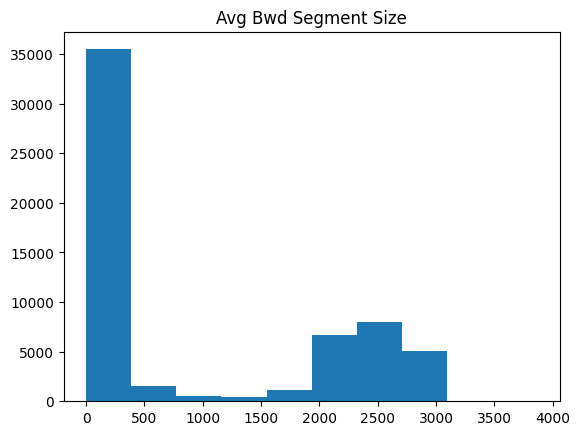

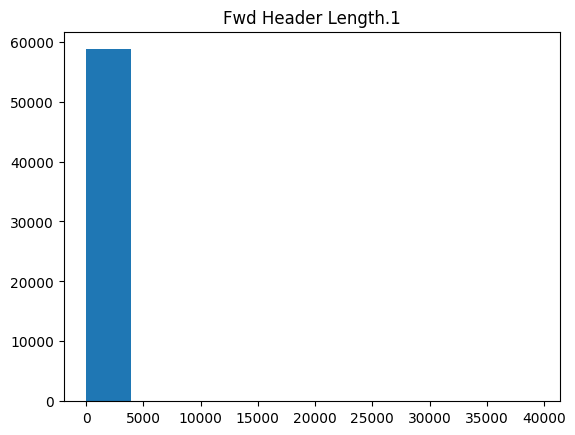

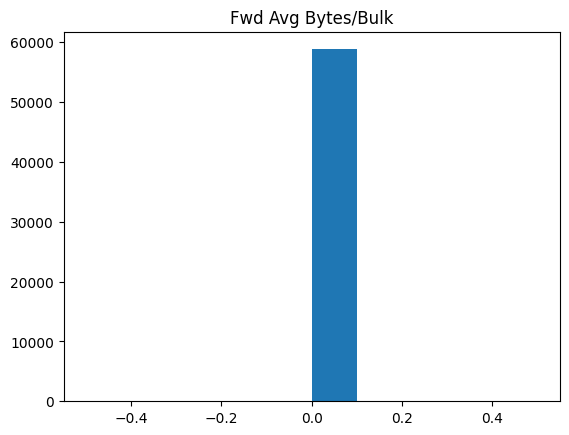

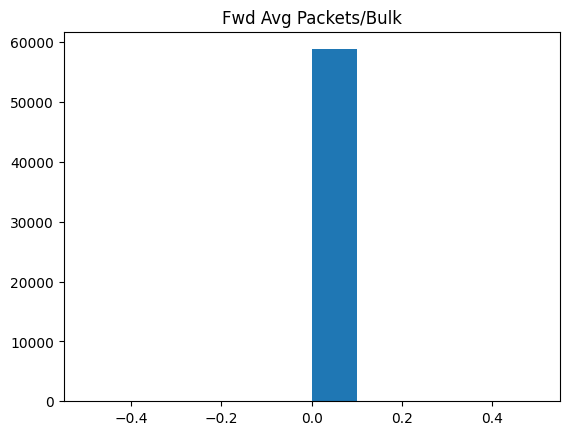

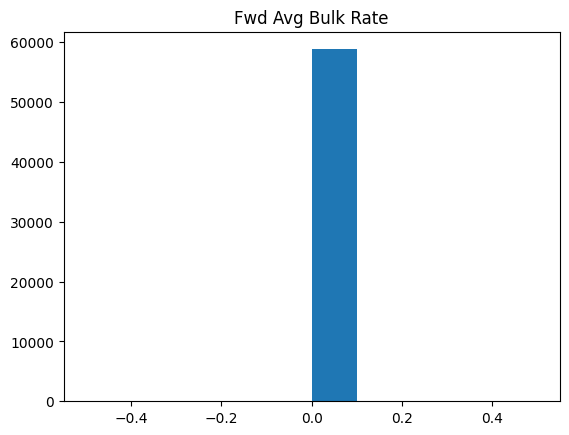

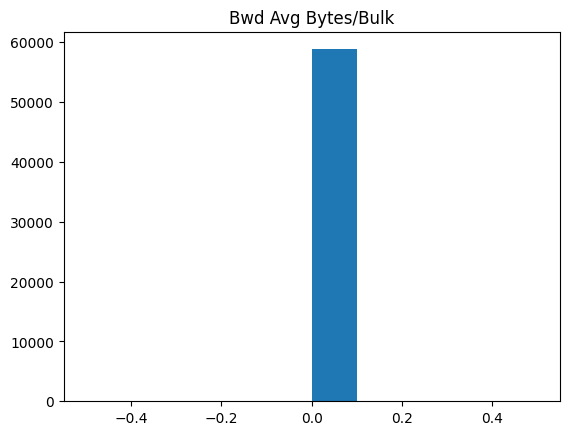

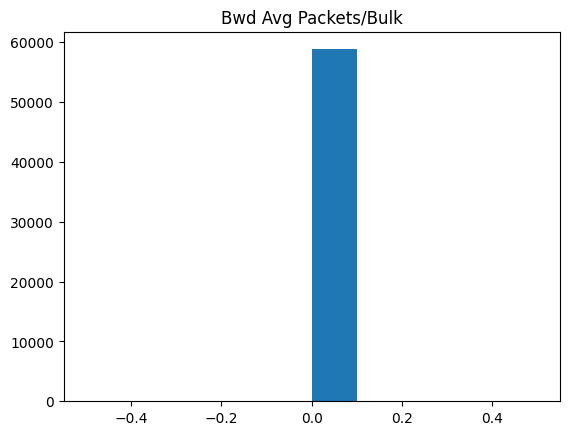

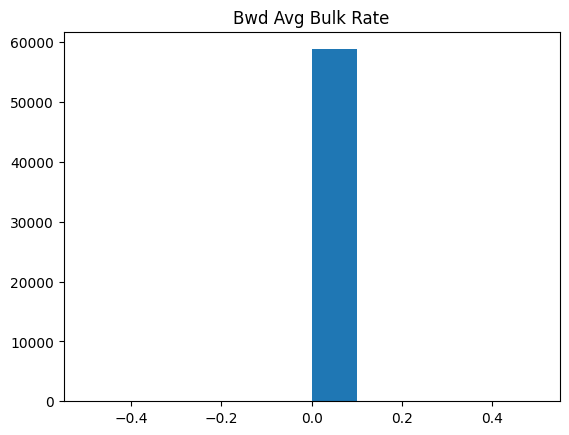

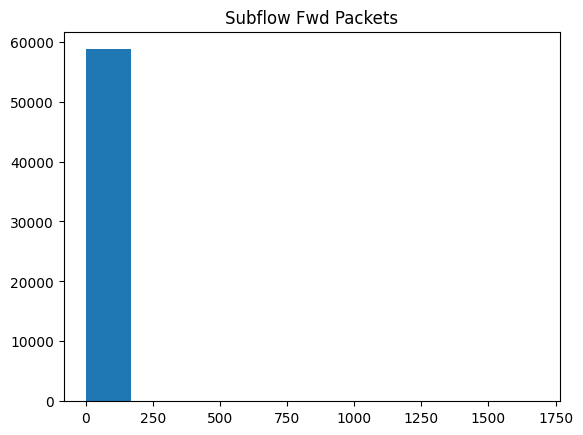

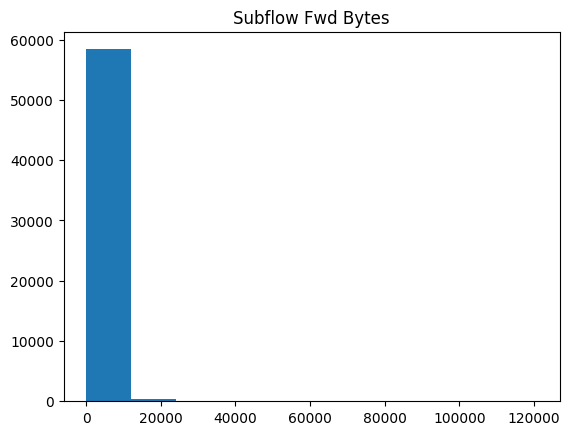

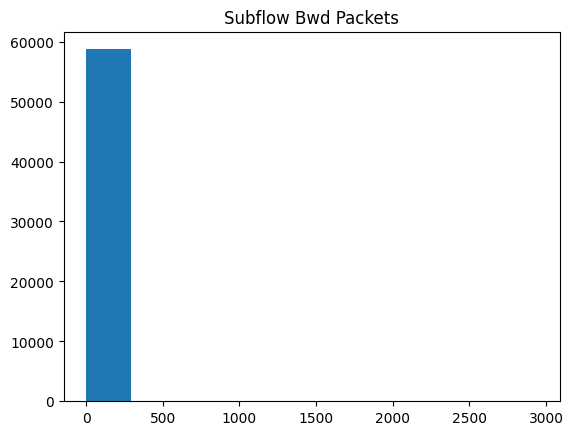

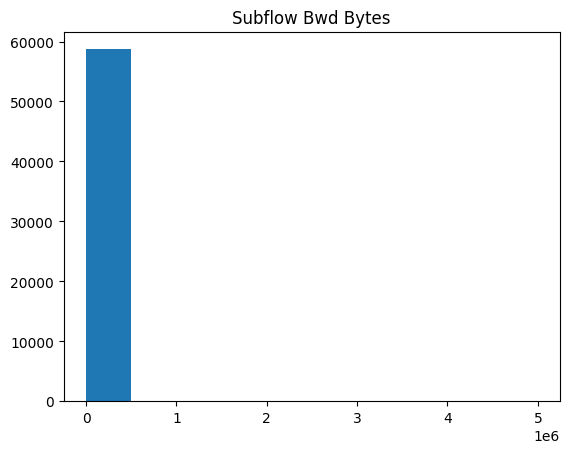

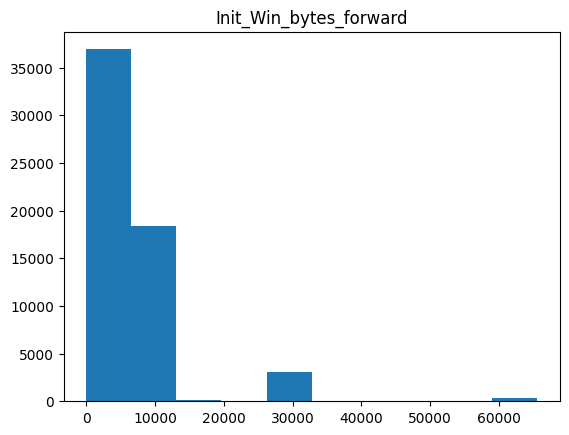

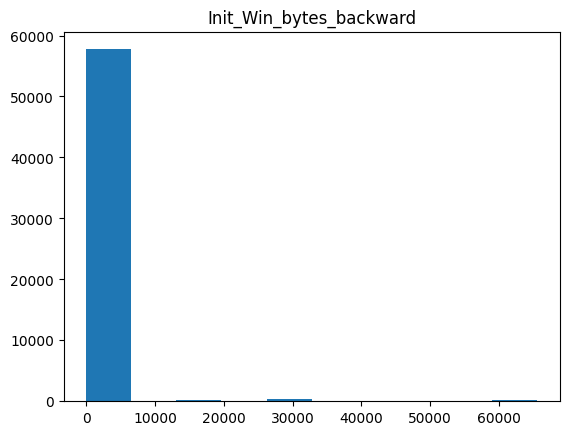

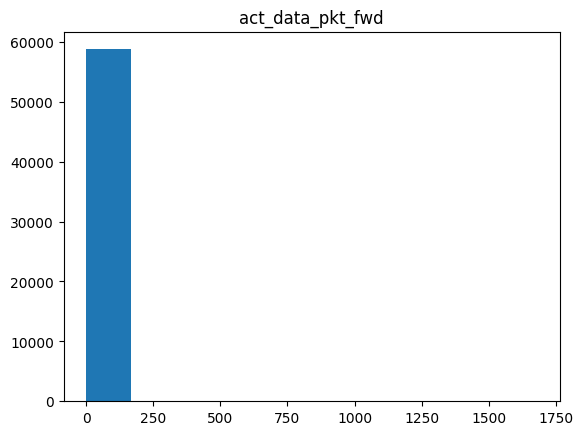

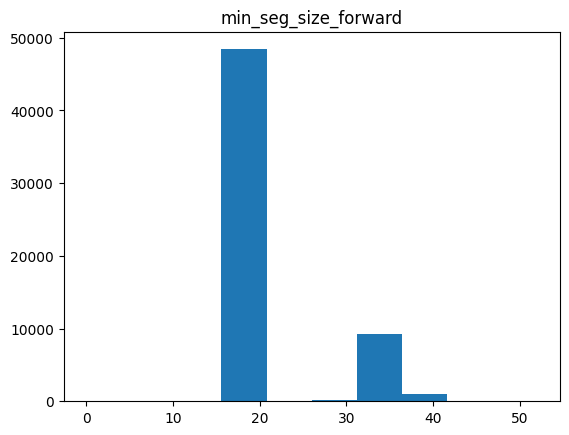

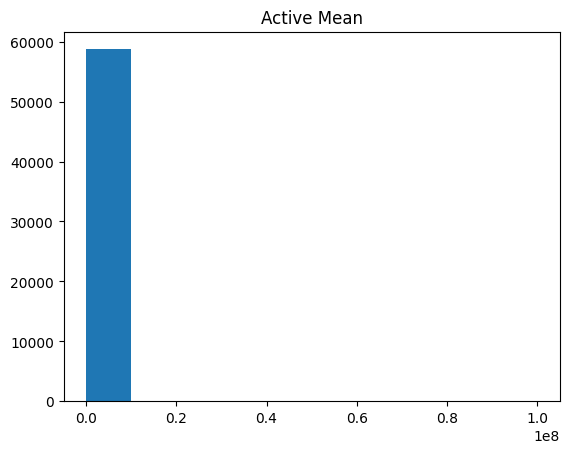

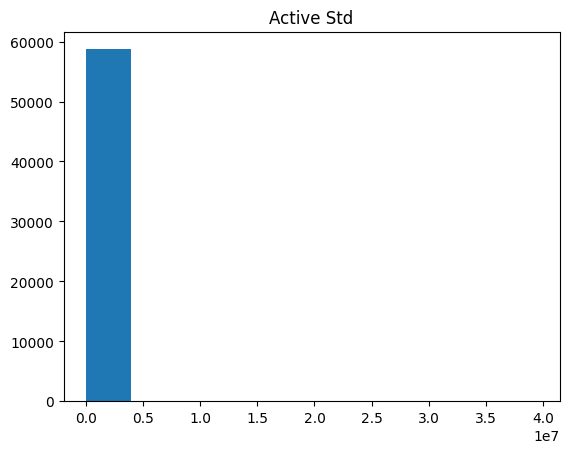

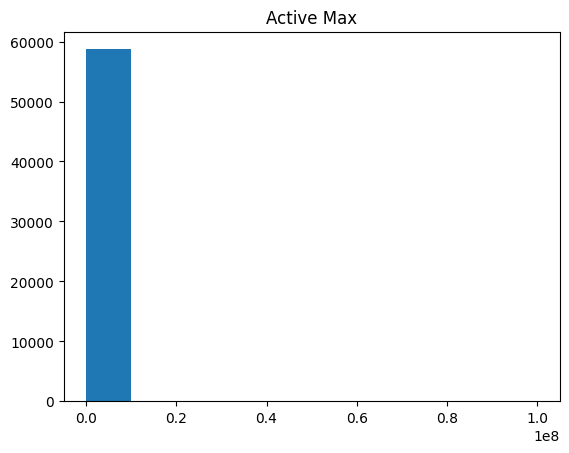

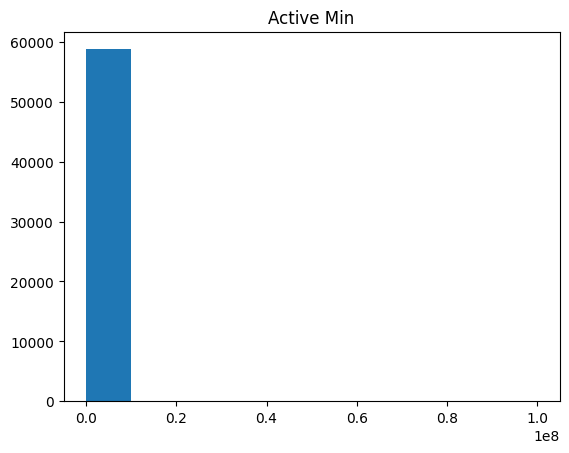

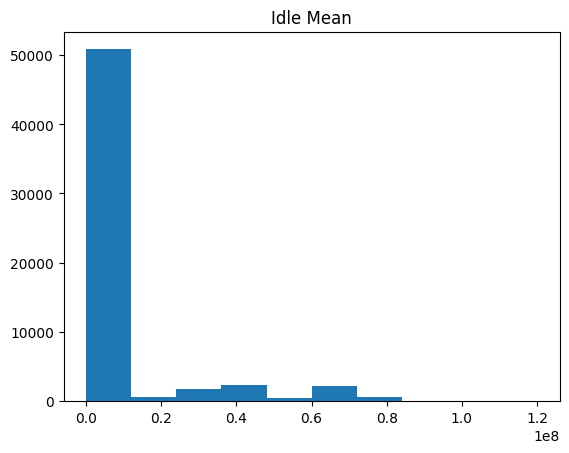

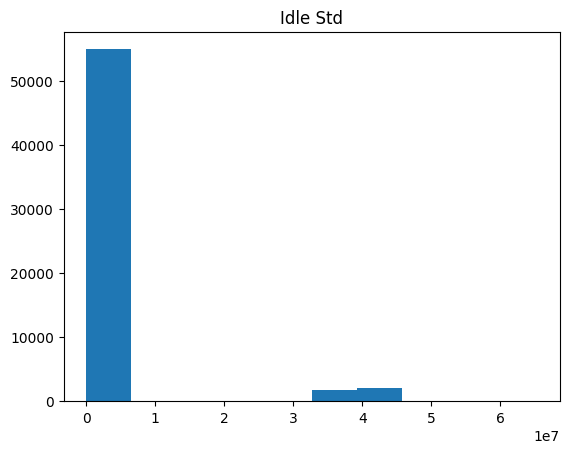

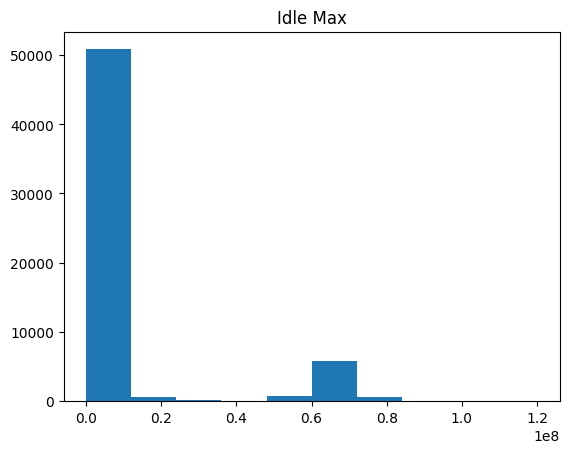

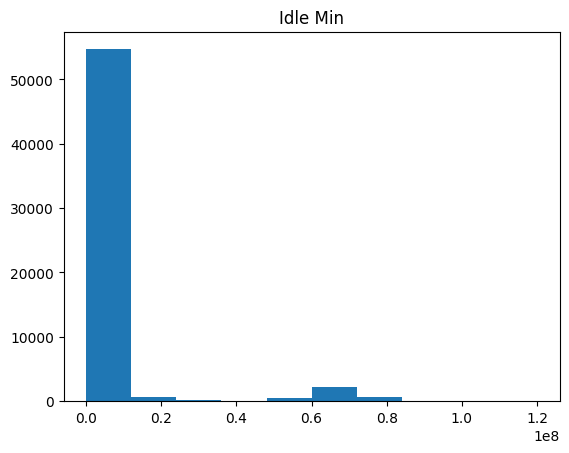

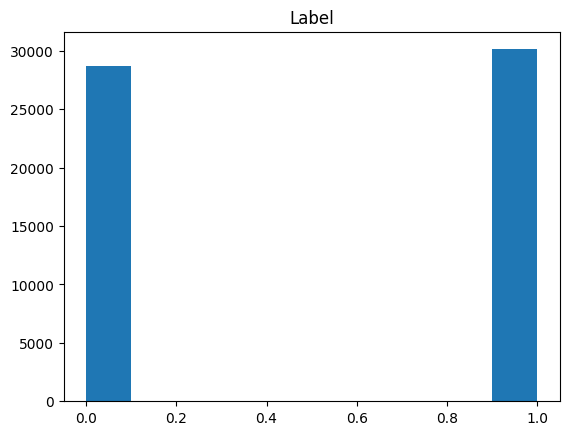

In [91]:
#create a histogram for each features
plt.figure(5)
for col in data_f.columns:
    plt.hist(data_f[col])
    plt.title(col)
    plt.show()

#Data Splitting

In [92]:
#split data into features and target variable
X=data_f.drop('Label',axis=1) # input
y=data_f['Label'] # output

#split the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [93]:
print("The train datasetcsize=",X_train.shape)
print("The test dataset size=",X_test.shape)

The train datasetcsize= (47043, 78)
The test dataset size= (11761, 78)


#train the Model

Random Forest

In [94]:
#random forest
rf_model=RandomForestClassifier(n_estimators=50,random_state=42)
rf_model.fit(X_train,y_train)
rf_pred=rf_model.predict(X_test)

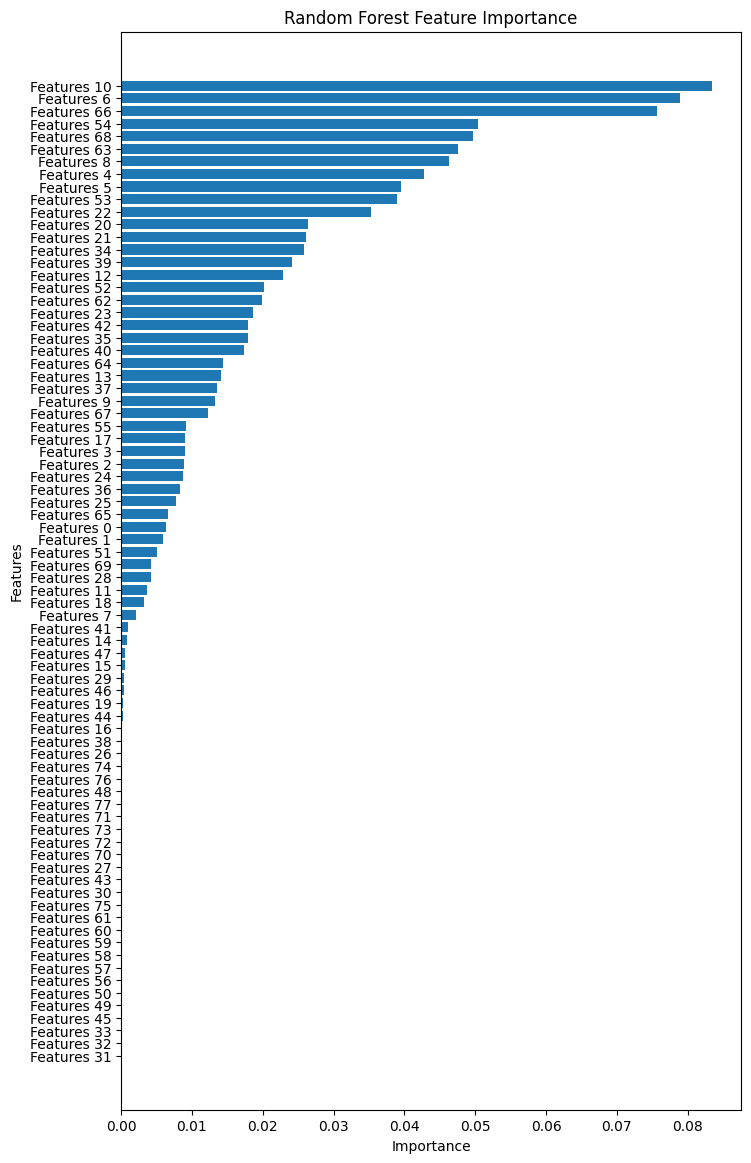

In [96]:
#Getting features importance from the trained model
importances=rf_model.feature_importances_

# Getting the indices of features sorted by importance
indices=sorted(range(len(importances)),key=lambda i:importances[i],reverse=False)
feature_name=[f"Features {i}" for i in indices]

#plotting features importance horizontally
plt.figure(figsize=(8,14))
plt.barh(range(X_train.shape[1]),importances[indices],align='center')
plt.yticks(range(X_train.shape[1]),feature_name)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

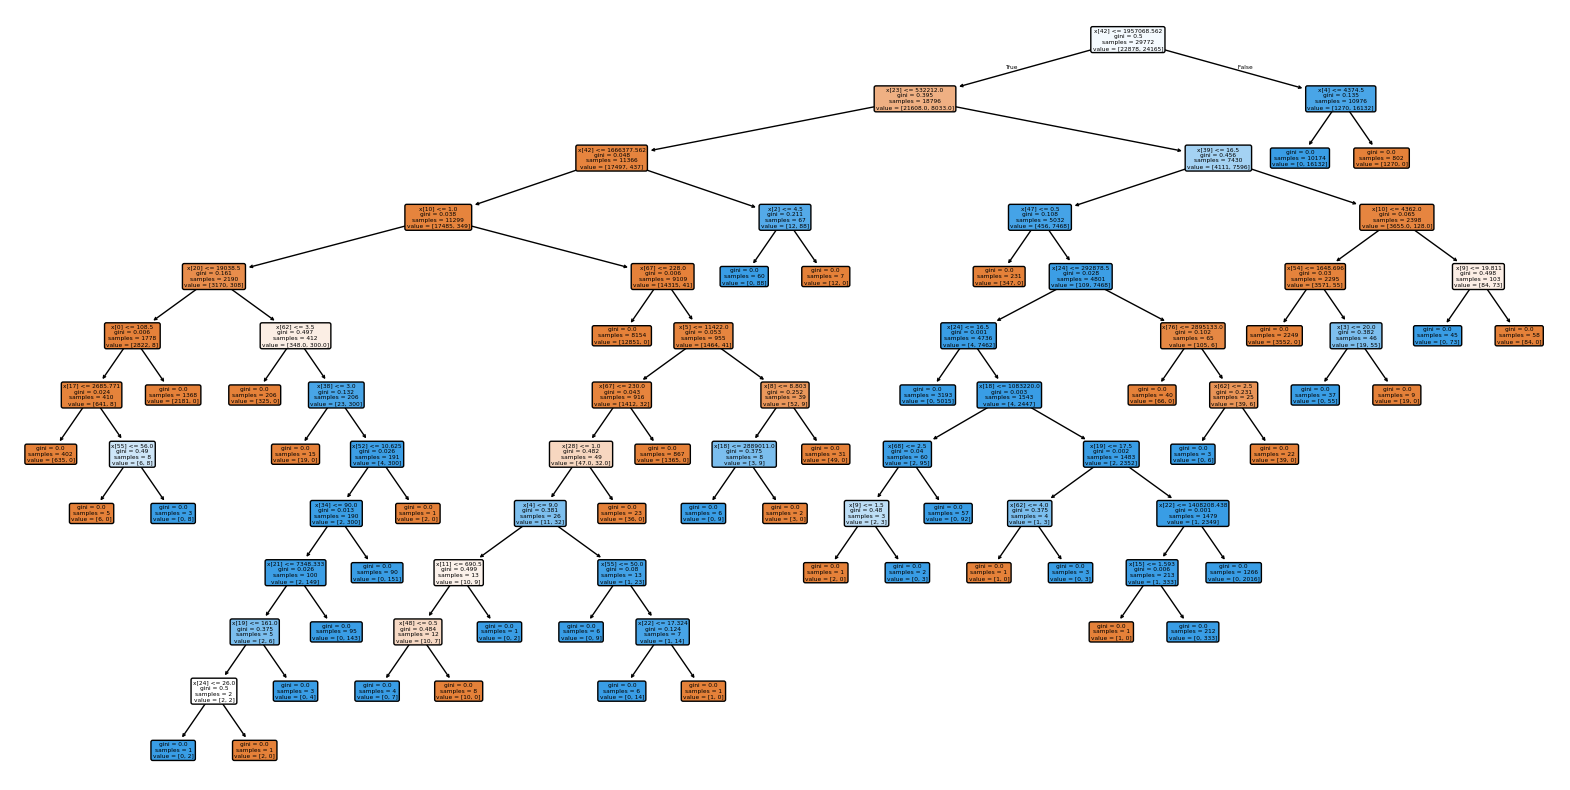

In [97]:
from sklearn.tree import plot_tree

estimator=rf_model.estimators_[0]

plt.figure(figsize=(20,10))
plot_tree(estimator,filled=True,rounded=True)
plt.show()

In [103]:
def plot_confusion_matrix(y_true,y_pred,classes,title):
    cm=confusion_matrix(y_true,y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=classes,yticklabels=classes)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

In [104]:
#Evaluate Random Forest
rf_accuracy=accuracy_score(y_test,rf_pred)
rf_f1=f1_score(y_test,rf_pred)
rf_precision=precision_score(y_test,rf_pred)
rf_recall=recall_score(y_test,rf_pred)

print("\n Random Forest Matrics")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1 Score: {rf_f1:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")



 Random Forest Matrics
Accuracy: 0.9999
F1 Score: 0.9999
Precision: 1.0000
Recall: 0.9998


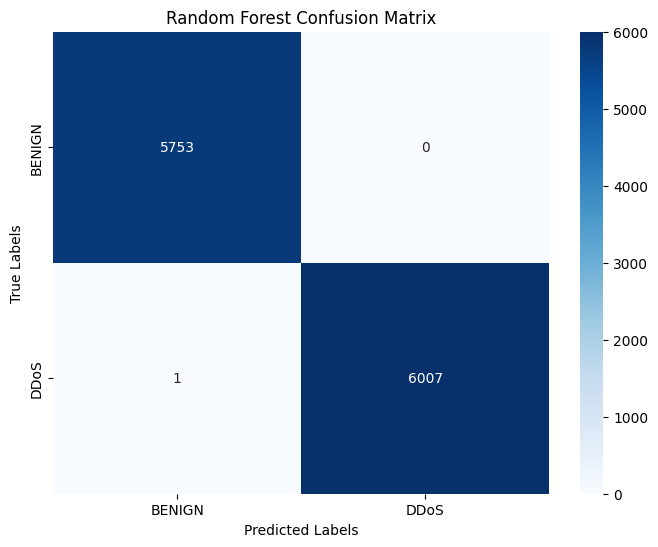

In [105]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test,rf_pred,['BENIGN','DDoS'],'Random Forest Confusion Matrix')

Logistic Regrassion

In [106]:
lr_model=LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluate Logistic Regression


In [110]:
lr_accuracy=accuracy_score(y_test,lr_pred)
lr_f1=f1_score(y_test,lr_pred)
lr_precision=precision_score(y_test,lr_pred)
lr_recall=recall_score(y_test,lr_pred)

print("\n Random Forest Matrics")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1 Score: {lr_f1:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")


 Random Forest Matrics
Accuracy: 0.9438
F1 Score: 0.9473
Precision: 0.9086
Recall: 0.9895


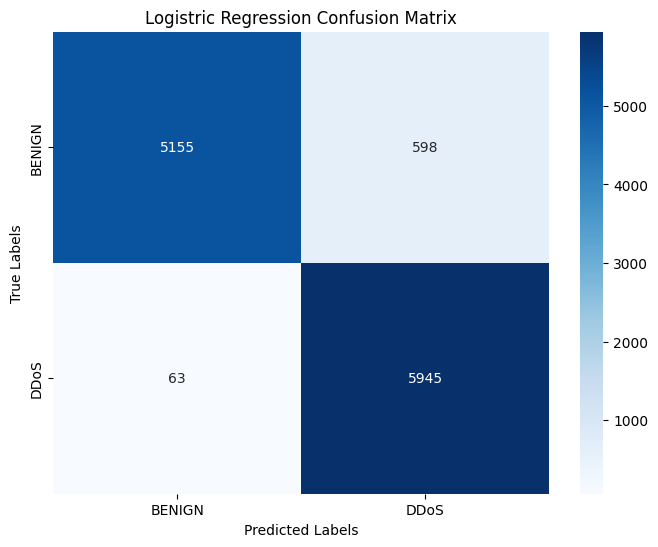

In [111]:
# Confusion Matrix for Logistic Regression
plot_confusion_matrix(y_test,lr_pred,['BENIGN','DDoS'],'Logistric Regression Confusion Matrix')

#Neural Network

In [112]:
nn_model=MLPClassifier(hidden_layer_sizes=(10,),max_iter=10,  random_state=42)
nn_model.fit(X_train,y_train)
nn_pred=nn_model.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


In [113]:
nn_accuracy=accuracy_score(y_test,nn_pred)
nn_f1=f1_score(y_test,nn_pred)
nn_precision=precision_score(y_test,nn_pred)
nn_recall=recall_score(y_test,nn_pred)

print("\n Random Forest Matrics")
print(f"Accuracy: {nn_accuracy:.4f}")
print(f"F1 Score: {nn_f1:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall: {nn_recall:.4f}")


 Random Forest Matrics
Accuracy: 0.9759
F1 Score: 0.9769
Precision: 0.9578
Recall: 0.9968


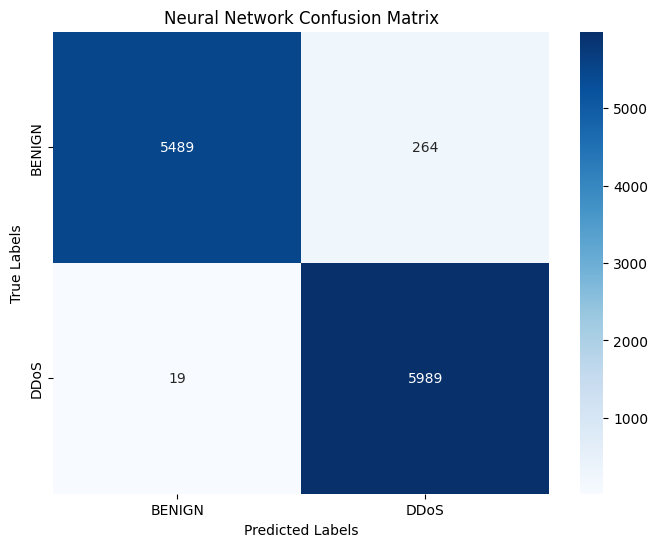

In [115]:
# Confusion Matrix for Neural Netword
plot_confusion_matrix(y_test,nn_pred,['BENIGN','DDoS'],'Neural Network Confusion Matrix')

#Model Comparision

In [116]:
# Random Forest
rf_proba=rf_model.predict_proba(X_test)

# Logistic Regression
lr_proba=lr_model.predict_proba(X_test)

# Neural Network
nn_proba=nn_model.predict_proba(X_test)

In [117]:
# Combine predictions for ROC curve

#Calculate ROC curve for Rsndom Forest
rf_fpr,rf_tpr,_ =roc_curve(y_test,rf_proba[:,1])
rf_auc=auc(rf_fpr,rf_tpr)

#Calculate ROC curve for Logistic Regression
lr_fpr,lr_tpr,_ =roc_curve(y_test,lr_proba[:,1])
lr_auc=auc(lr_fpr,lr_tpr)

#calculate ROC curve for neural network
nn_fpr,nn_tpr,_ =roc_curve(y_test,nn_proba[:,1])
nn_auc=auc(nn_fpr,nn_tpr)


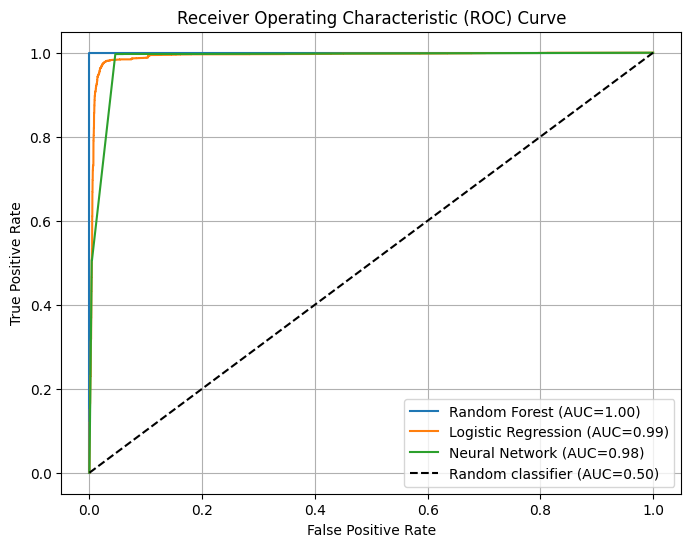

In [119]:
#plot ROC Curve for all models
plt.figure(figsize=(8,6))
plt.plot(rf_fpr,rf_tpr,label=f'Random Forest (AUC={rf_auc:.2f})')
plt.plot(lr_fpr,lr_tpr,label=f'Logistic Regression (AUC={lr_auc:.2f})')
plt.plot(nn_fpr,nn_tpr,label=f'Neural Network (AUC={nn_auc:.2f})')

#plot ROC curve for random classifier(50% area)
plt.plot([0,1],[0,1],linestyle='--',color='black',label='Random classifier (AUC=0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

Completed